### Analysis of bikes mobility data 
This is inspired by the workshop https://github.com/technologiestiftung/bike-sharing
    and data shared by Citylab Berlin scientists.
Thanks to Alexandra Kapp and Fabien for inspiration and data, code and ideas sharing.     
    
One can do analysis similar to one which I did with other trajectories for mobility https://github.com/Liyubov/mobility_analysis   
Work in progress...

In [8]:
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
import csv


# load data, it is very heavy 

df = pd.read_csv('C:/Users/lyubo/Documents/DATA_networks/mobilitydata/bikes_sharing_data_technologiestiftung_berlin/pseudonomysed_raw.csv')
df.head()

df_cleaned = pd.read_csv('C:/Users/lyubo/Documents/DATA_networks/mobilitydata/bikes_sharing_data_technologiestiftung_berlin/pseudonomysed.csv')


df.columns = ["id", "id.1", "id.1.1", "latitude", "longitude", "next_lat", "next_lon", "distance", "duration", "speed", "starttime", "endtime"]
df_cleaned.columns = ["id", "id.1", "latitude", "longitude", "next_lat", "next_lon", "distance", "duration", "speed", "starttime", "endtime"]


### Data analysis 

It would be interesting also to see the network of roads of Berlin (to find). We start with simple things:
1. distribution of routes 
2. distribution of lengths of routes 
3. fits of distribution of routes

### Research questions 

1. Does bike mobility data (bike sharing) have particular properties? 
2. How different types of transport are influencing each other, e.g scooter data inlfuence bikes (temporal evolution of data - average in time)?
3. How network and distribution of bikes can influnece bike sharing capability?


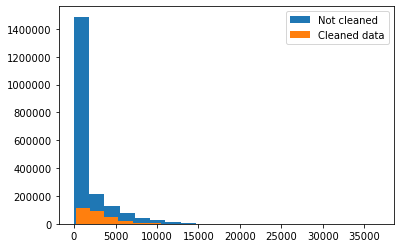

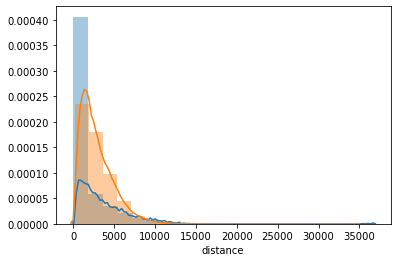

In [9]:
# Now we count the length of routes. 
# This can tell us if airlines fly more shorter routes, or more longer ones. 

import math
import matplotlib.pyplot as plt

import seaborn


# now we apply this function to routes dataframe
#route_lengths = routes.apply(calc_dist, axis=1)

# now we are plotting the histogram 
plt.hist(df.distance, bins=20)
plt.hist(df_cleaned.distance, bins=20)
plt.legend(['Not cleaned', 'Cleaned data']) #plt.legend(["Time window size"])
plt.show()

seaborn.distplot(df.distance, bins=20)
seaborn.distplot(df_cleaned.distance, bins=20)
plt.show()

### Plotting on a map 

We use standard modules basemap for that. One can also use this module https://basemaptutorial.readthedocs.io/en/latest/plotting_data.html 

C:\Users\lyubo\Anaconda3\envs\default\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.

C:\Users\lyubo\Anaconda3\envs\default\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.



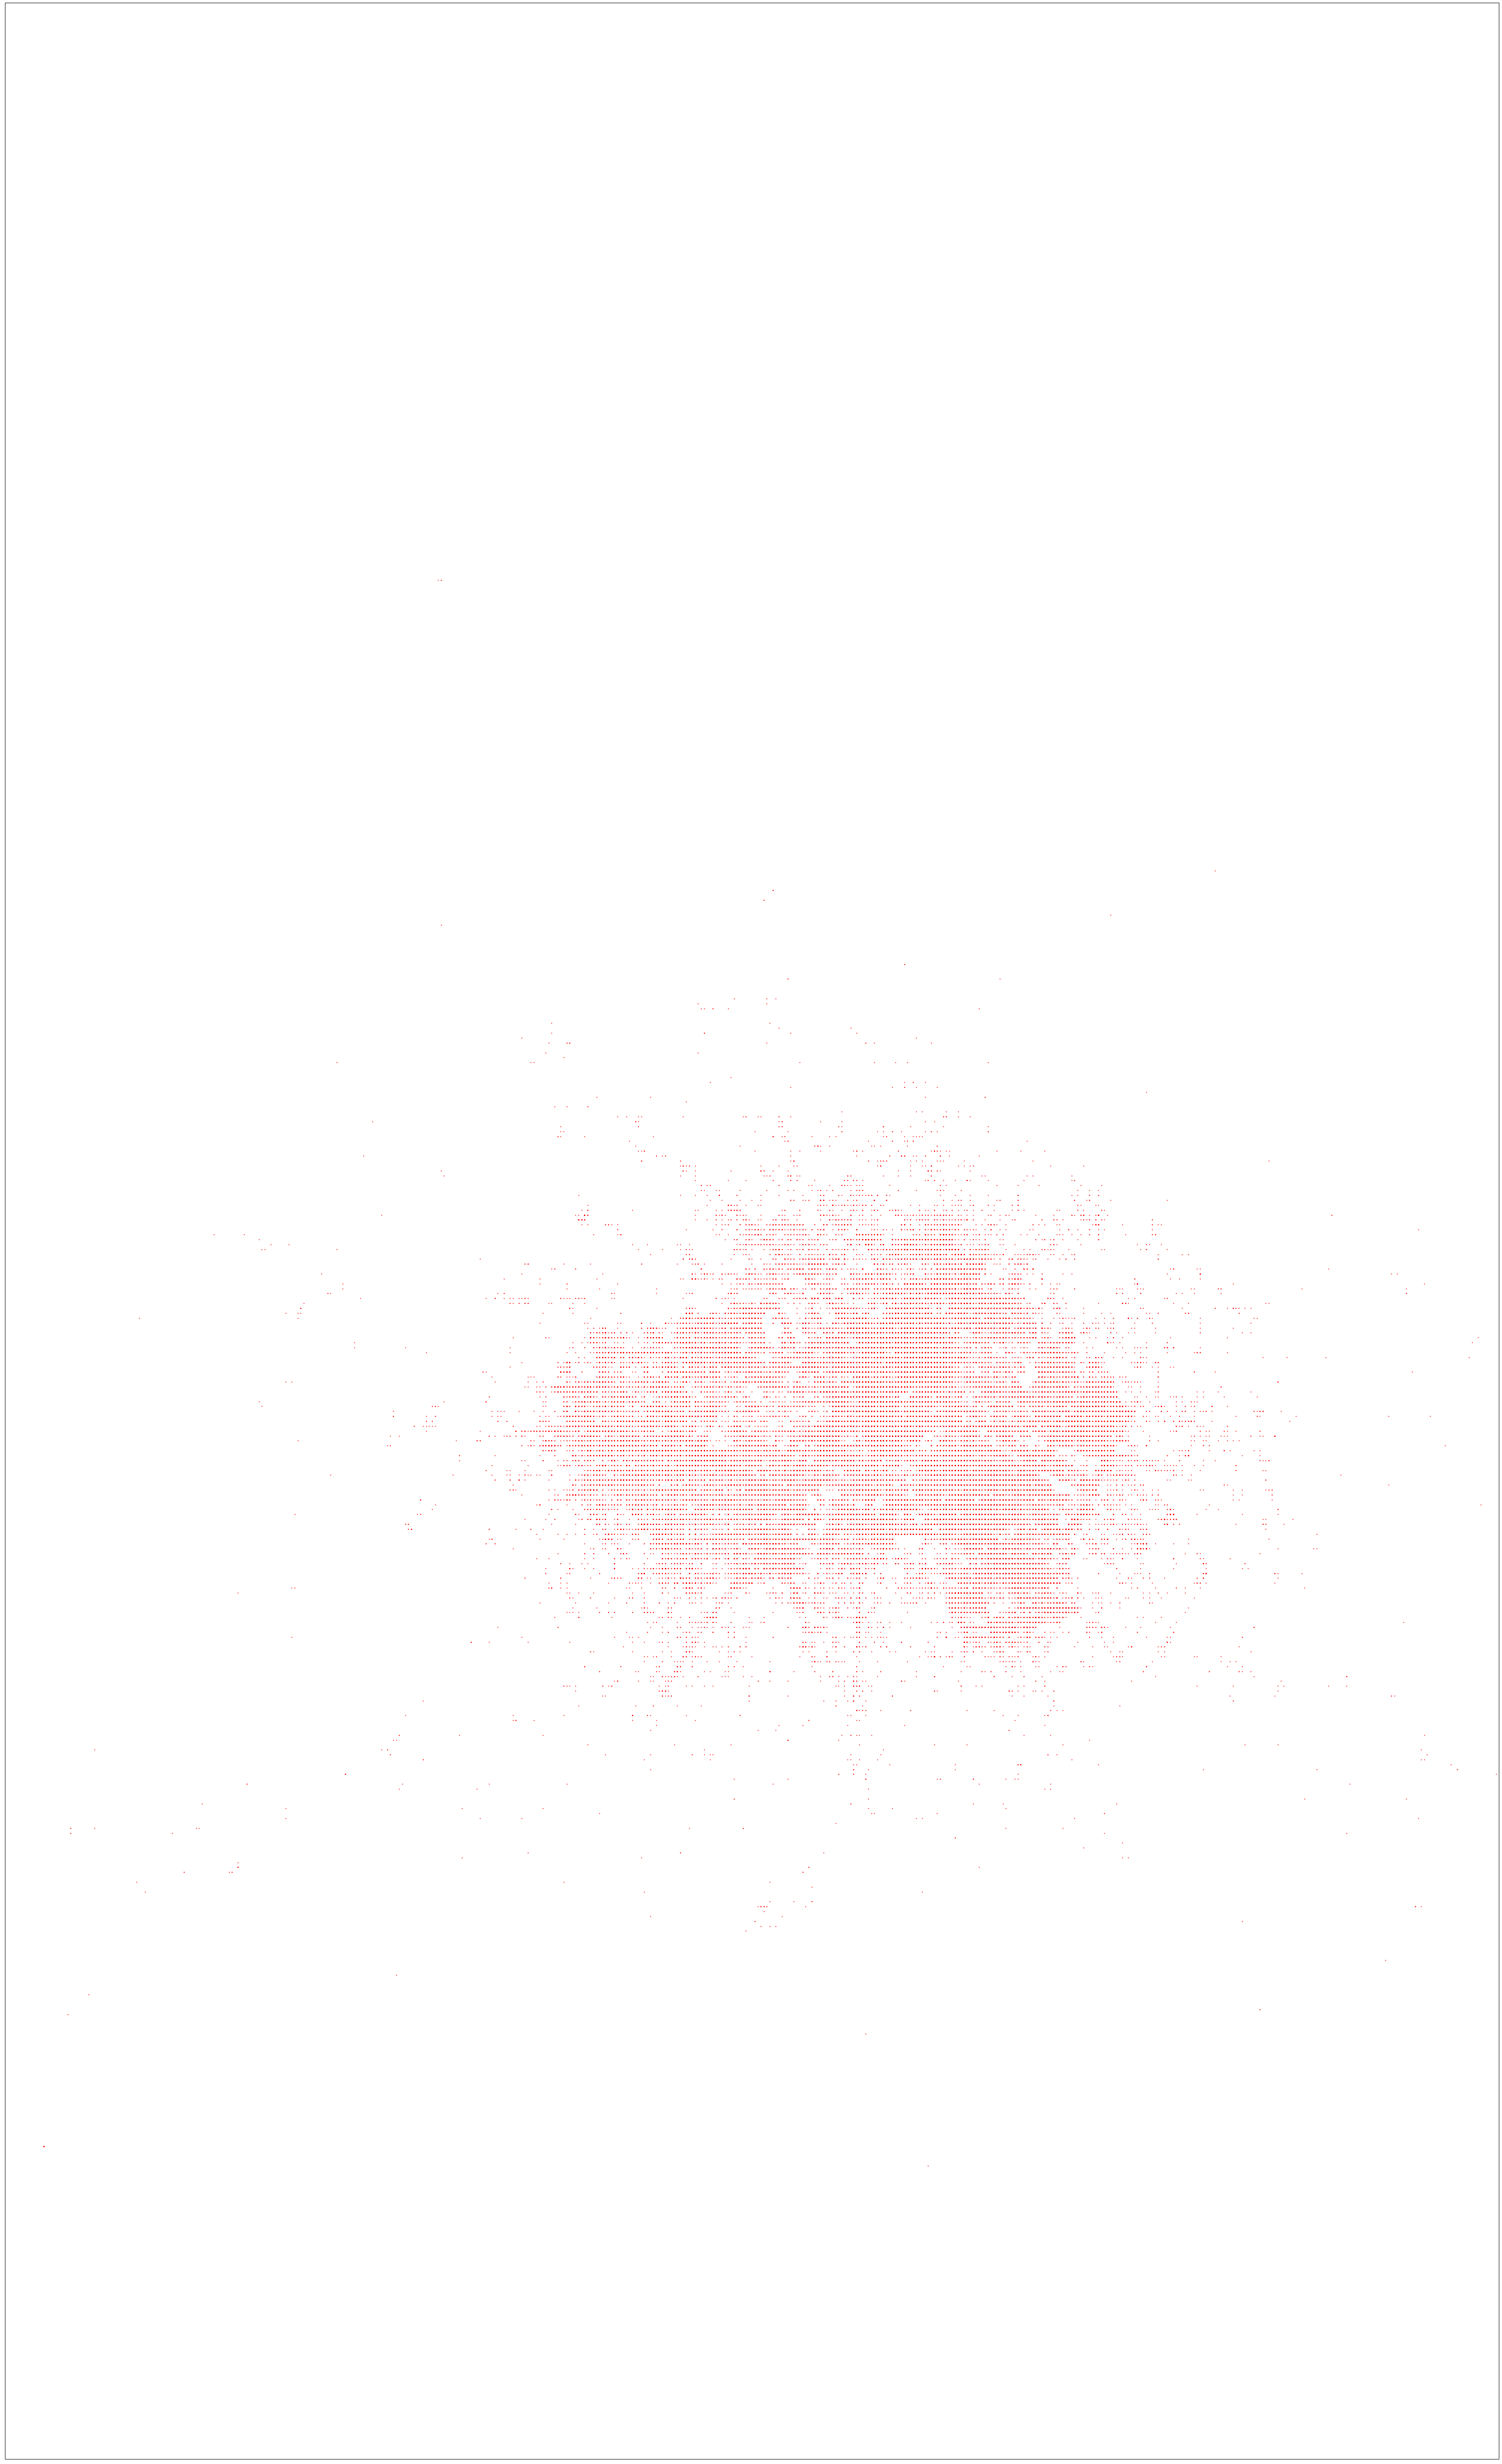

In [13]:
# Now let us plot data on a maps
# First we define x as ids of places
# Import the basemap package using latitude and longitude pairs for airports. The first map we can make is one that shows all the airports all over the world. We can do this with the basemap extension to matplotlib. This enables drawing world maps and adding points, and is very customizable.

import math
import matplotlib.pyplot as plt

import seaborn
from mpl_toolkits.basemap import Basemap

# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.



# Create a map on which to draw. 
# Use mercator projection, and showing the whole world.

fig, ax = plt.subplots(figsize=(100, 100))

# Berlin Latitude: 52.520008, longitude: 13.404954.
# We want to plot only Berlin surrounding areas
m = Basemap(projection='merc',llcrnrlat=52.3,urcrnrlat=52.8,llcrnrlon=13.1,urcrnrlon=13.6,lat_ts=20,resolution='c')
# Draw coastlines, and the edges of the map. NASA bluemarble
m.shadedrelief() #m.bluemarble()


m.drawcoastlines()
m.drawmapboundary()

# Convert latitude and longitude to x and y coordinates
x, y = m(list(df_cleaned["longitude"].astype(float)), list(df_cleaned["latitude"].astype(float)))

# Use matplotlib to draw the points onto the map.
m.scatter(x,y,1,marker='o',color='red')
# Show the plot.
plt.show()



## Correlation with the weather and other metadata

By metadata we mean distribution of places, e.g. libraries, nearby, or kindergarten (ideas from hackatons).

We can also analyse the influence of trajectories by weather using this notebook 
https://exploratory.openhumans.org. Thanks to www.openhumans.org for ideas and shared notebooks (Bastian).

The weather data can come from Dark Sky and their API: DARKSKY_KEY for their API to use this notebook. You can create one for free on their website. Dark Sky allows you to make 1,000 calls per day for free. This notebook makes at worst 1 call for each day that is in your DATARANGE. So the 1,000 calls can get you ~ 2 1/2 years of local weather data. Once you have made an account you can enter you DARKSKY_KEY in the cell below.

The DATARANGE_START and DATARANGE_END give the boundaries for which your analysis should be run (in YYYY-MM-DD format). Choose the values so that you have some Moves data between those boundaries and also that you're not requesting too much data from Dark Sky (or pay for requesting more data from dark sky, after the first 1,000 calls each day of weather data will be USD 0.0001).

... work in progress to analyze correlation between bikes moves and weather.

... work in progress for analysis of mobility as in  https://github.com/Liyubov